Questions: 
    1. Line 147, why is it not reading 'object_id'..cannot do any modeling without doing this first.
    2. How would you have gone about initially doing this project, would like to hear your perspective. 

In [115]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas as pd
import datetime
from datetime import timedelta
from collections import Counter
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [116]:
user_engage = pd.read_csv('takehome_user_engagement.csv')
user_info = pd.read_csv('takehome_users.csv', encoding="ISO-8859-1") 

# Data Wrangling 

In [132]:
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [119]:
user_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [133]:
user_engage['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
6763       1
3773       1
5822       1
10040      1
2047       1
Name: user_id, Length: 8823, dtype: int64

In [134]:
user_engage['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [122]:
user_info.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [135]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  logged_in                   12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


Change last_session_creation_time in user_engage to timestamp/datetime object

In [136]:
user_info.last_session_creation_time = pd.to_datetime(user_info.last_session_creation_time, unit='s')
user_info.last_session_creation_time = user_info.last_session_creation_time.fillna(user_info.creation_time)
user_info

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,logged_in
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0


Change time_stamp in user_engage to timestamp/datetime object

In [137]:
user_engage['time_stamp'] =pd.to_datetime(user_engage['time_stamp'])
user_engage

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


Convert creation time to datetime

In [138]:
user_info['creation_time']= pd.to_datetime(user_info['creation_time'])
user_info

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,logged_in
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0


# Exploratory Data Analysis

# Step 1: 
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period

In [139]:
user_engage.groupby(['user_id'])['visited'].sum()

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Name: visited, Length: 8823, dtype: int64

In [140]:
def login(input_time):
    """Determine if the user visited the page based on the presence of last session creation time."""
    if input_time==0:
        return 1
    else:
        return 0

user_info['logged_in']= user_info['last_session_creation_time'].apply(login) 

In [141]:
user_engage['week-year'] = user_engage['time_stamp'].dt.strftime('%U-%Y')
user_info = user_engage.groupby(['user_id', 'week-year']).size().reset_index().rename(columns={0:'count'})
user_info.head()

,user_id,week-year,count
0,1,16-2014,1
1,2,01-2014,1
2,2,05-2014,2
3,2,06-2014,2
4,2,07-2014,1


In [142]:
adopted_id = user_info[user_info['count'] >=3]['user_id'].unique()
len(adopted_id)

1432

In [147]:
def adopted(user_id):
    """Function to classify an user as adopted, based on the list of adoptd users provided."""
    if user_id in adopted_id:
        return 1
    else:
        return 0

user_info['adopted']= user_info['object_id'].apply(adopted) 

KeyError: 'adopted_id'

AttributeError: 'DataFrame' object has no attribute 'creation_source'

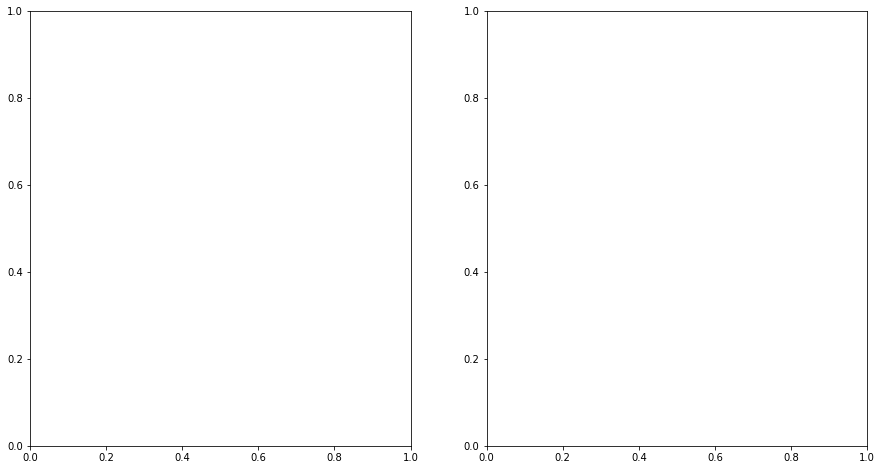

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.countplot(user_info.creation_source, ax=ax1)
ax1.set_xticklabels(['Guest Invite', 'Org Invite', 'Signup', 'Personal Projects', 'Signup Google Auth'],rotation=90)
ax1.set_title('Countplot of Creation Sources',fontsize=15)

sns.countplot(user_info.adopted, ax=ax2)
ax2.set_xticklabels(['Not Adopted', 'Adopted'])
ax2.set_title('Counts of Adopted and Non Adopted Users', fontsize=15)  

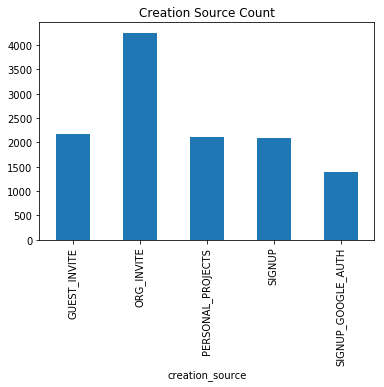

In [23]:
user_info.groupby(['creation_source'])['creation_source'].count().plot(kind="bar", title="Creation Source Count")

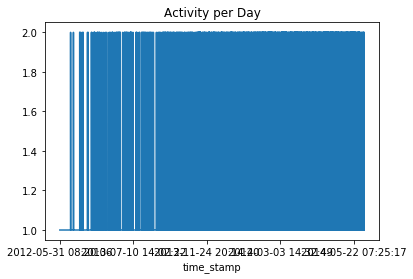

In [54]:
# Use trend by day
#extract date from timestamp !!

user_engage.groupby(['time_stamp'])['user_id'].count().plot(title="Activity per Day")
# [takehome_user_engagement.date < takehome_user_engagement.date.max()]

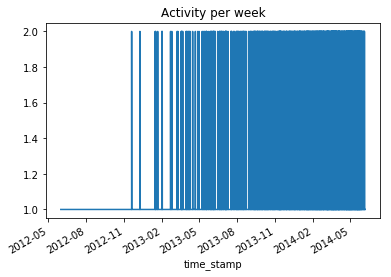

In [109]:
# Use trend by week
#extract date from timestamp !!

user_engage.groupby(['time_stamp'])['user_id'].count().plot(title="Activity per week")
# [takehome_user_engagement.date < takehome_user_engagement.date.max()]

# Modeling

# Step 2: 
Identify  which  factors  predict  future  user adoption

In [124]:
users = user_info.drop(['creation_time','name','email','last_session_creation_time'],1)

In [125]:
cs_onehot_features = pd.get_dummies(users['creation_source'])
users=pd.concat([users, cs_onehot_features], axis=1)
users = users.drop(['creation_source'],1)
users.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,1,0,0,0,0
1,2,0,0,1,316.0,0,1,0,0,0
2,3,0,0,94,1525.0,0,1,0,0,0
3,4,0,0,1,5151.0,1,0,0,0,0
4,5,0,0,193,5240.0,1,0,0,0,0


In [150]:
from sklearn.ensemble import GradientBoostingClassifier

X = users.drop('adopted', axis=1)
y = users.adopted

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print('Testing score: ',model.score(X_test, y_test))

KeyError: "['adopted'] not found in axis"

In [ ]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

gbc_features = FeatureImportances(GradientBoostingClassifier(), ax=ax)
gbc_features.fit(X, y)
gbc_features.poof()

# Summary

We used a gradient boosting classification model, because this is a claissifcation problem. The score was ..%. Regarding, the top features that factors predicted user adoption, they were: